In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("dataframe_.csv")
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


# EDA

In [3]:
data.shape

(1697, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [7]:
# Checking correlation
data.corr()

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


In [8]:
#checking for missing data 
data.isnull().sum()

input     1
output    1
dtype: int64

In [9]:
#Dropping null values
data.dropna()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [10]:
# Data Types for Each Attribute
types = data.dtypes
print(types)

input     float64
output    float64
dtype: object


# Data Visualization

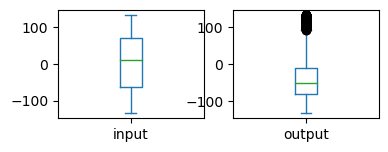

In [12]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

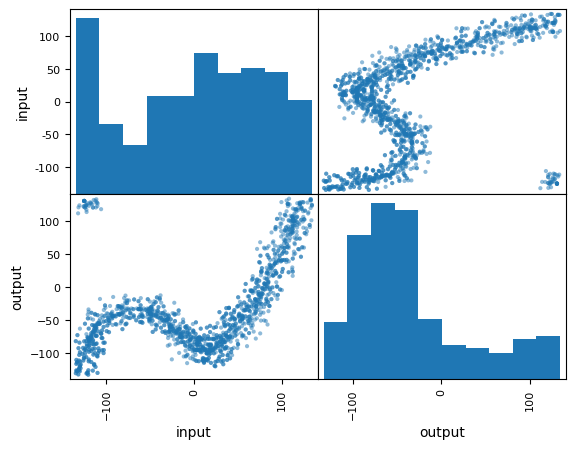

In [14]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(data)
plt.show()

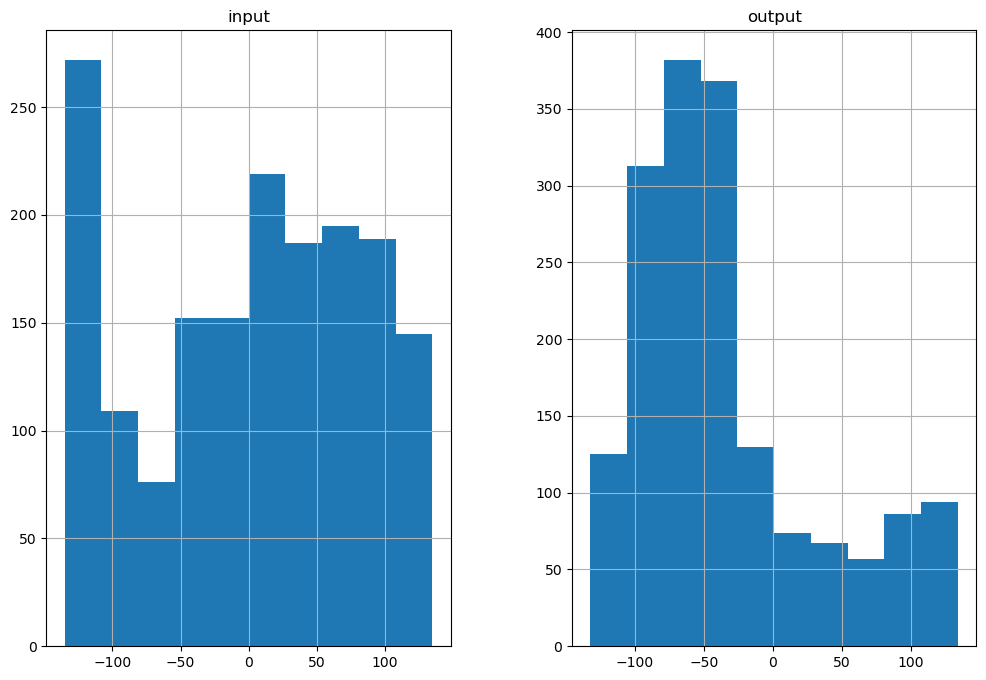

In [15]:
#Univariate Histograms
data.hist(figsize=(12, 8))
plt.show()

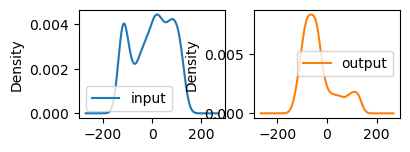

In [16]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

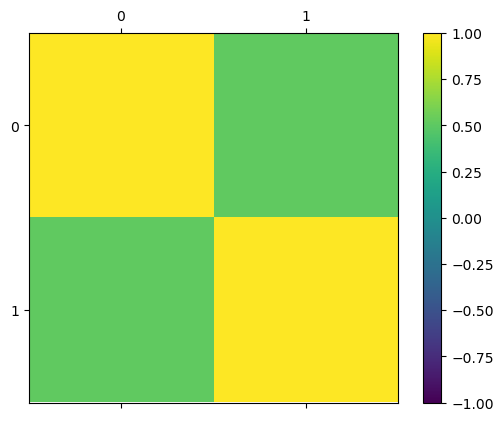

In [18]:
# Correction Matrix Plot (generic)
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111) #"111" means "1x1 grid, first subplot" 
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

<AxesSubplot:>

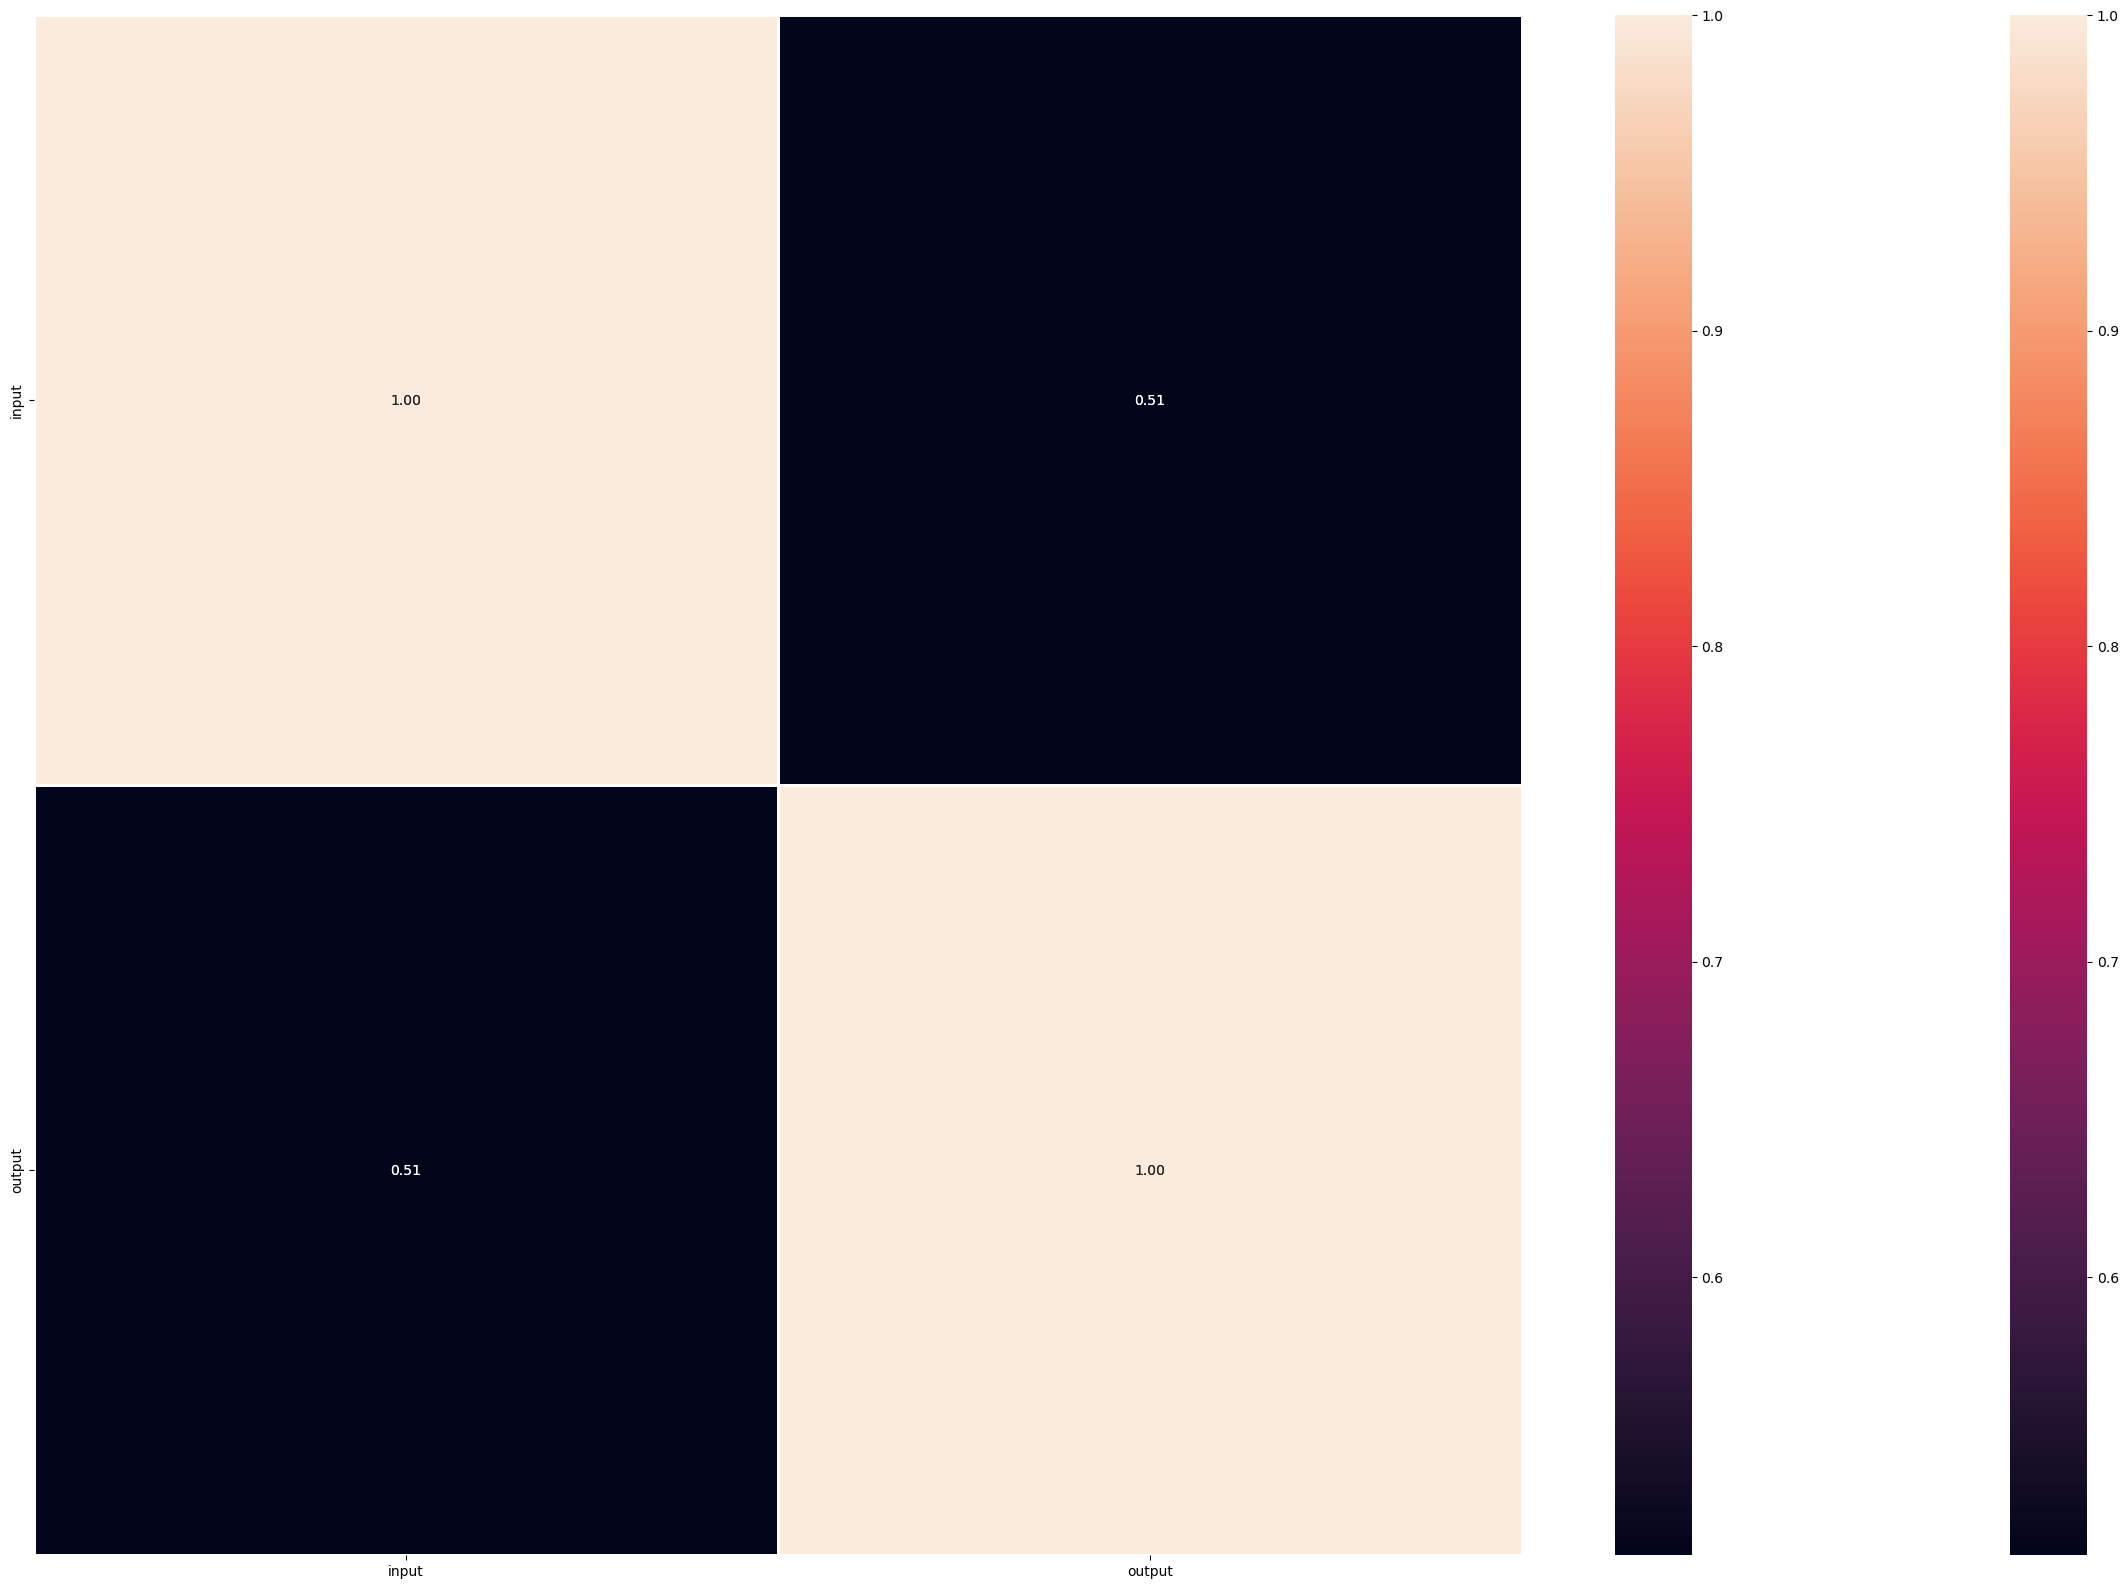

In [19]:
ax=plt.subplots(figsize=(30,20))
#sns.heatmap(data.corr())
sns.heatmap(data.corr(), annot=True, linewidths=1, fmt='.2f', mask= np.zeros_like(data.corr(),dtype=np.bool))
sns.heatmap(data.corr(), annot=True, linewidths=1, fmt='.2f', mask= np.zeros_like(data.corr(),dtype=np.bool))
            

In [21]:
corr_output=data.corr()['output']

In [22]:
y=corr_output.to_list()
x=data.columns

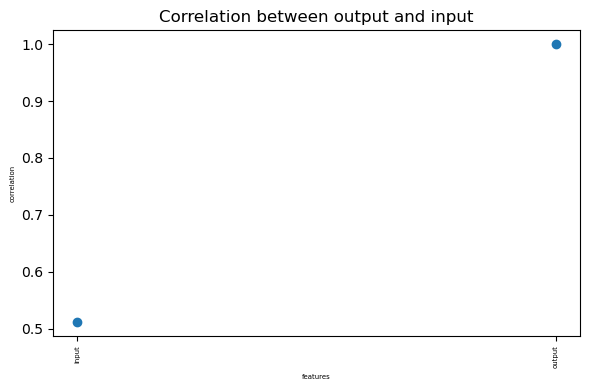

In [24]:
plt.figure(figsize=[6,4])
plt.scatter(x,y,)
plt.title("Correlation between output and input")
plt.xlabel("features", size=5)
plt.ylabel("correlation", size=5)
plt.xticks(x, [str(i) for i in x], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=5)

plt.tight_layout()
plt.show()

In [27]:
np.seterr(all='warn')
A = np.array([10])
a=A[-1]
a**a
import pandas_profiling as pp
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html') 
EDA_report 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
#checking for duplicates in the dataset
data1=data.drop_duplicates(keep='first') 

In [29]:
data1.shape

(1091, 2)

In [40]:
data1.fillna(0) 

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


In [42]:
data2 = data1.reset_index()

In [70]:
data2.replace(to_replace = np.nan, value = 0)
data3 = data2.reset_index()

In [57]:
df = np.where(data3.values >= np.finfo(np.float64).max)

In [60]:
df

(array([], dtype=int64), array([], dtype=int64))

# Data Rescaling

In [46]:
# Rescale data (between x and y)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'dataframe_.csv'
names = ['input','output']
data = read_csv(filename, names=names)

array = data1.values
# separate array into input and output components
X = array[:,0:1]
Y = array[:,1]

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.05]
 [0.05]
 [0.  ]
 [0.05]
 [0.02]]


# Feature Engineering

In [76]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
filename = 'dataframe_.csv'
names = ['input','output']
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:1]
Y = array[:,1]

# feature extraction
model = LogisticRegression(max_iter=500)

rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

fit.n_features_
fit.support_
fit.ranking_

ValueError: could not convert string to float: 'input'

# Model Building

In [63]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [ ]:
model=smf.ols('output~input', data=df).fit() 

ERROR! Session/line number was not unique in database. History logging moved to new session 256


In [ ]:
model.rsquared

In [ ]:
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer 

t=[('num',StandardScaler(),['input'])]
transformer=ColumnTransformer(transformers=t,remainder='passthrough') 
transformer.fit(X_train)  

# transform training data.
X_train = transformer.transform(X_train) 

# transform the test data.
X_test = transformer.transform(X_test) 


In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet 
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor


In [ ]:
#implementing DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

#predicting using the test set
y_pred_DTR = DTR.predict(X_test)
MAE1=mean_absolute_error(Y_test,y_pred_DTR)
MSE1=mean_squared_error(Y_test,y_pred_DTR)
R2S1=r2_score(Y_test,y_pred_DTR)


In [ ]:
R2S1

In [ ]:
#implementing RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)

#predicting using the test set
y_pred_RFR = RFR.predict(X_test)
MAE2=mean_absolute_error(Y_test,y_pred_RFR)
MSE2=mean_squared_error(Y_test,y_pred_RFR)
R2S2=r2_score(Y_test,y_pred_RFR)


In [ ]:
R2S2

In [ ]:
#implementing ExtraTreeRegressor
ETR=ExtraTreeRegressor()
ETR.fit(X_train,Y_train)

#predicting using the test set
y_pred_ETR = ETR.predict(X_test)
MAE3=mean_absolute_error(Y_test,y_pred_ETR)
MSE3=mean_squared_error(Y_test,y_pred_ETR)
R2S3=r2_score(Y_test,y_pred_ETR)


In [ ]:
R2S3

In [ ]:
#implementing BaggingRegressor
BAG=BaggingRegressor()
BAG.fit(X_train,Y_train)

#predicting using the test set
y_pred_BAG = BAG.predict(X_test)
MAE4=mean_absolute_error(Y_test,y_pred_BAG)
MSE4=mean_squared_error(Y_test,y_pred_BAG)
R2S4=r2_score(Y_test,y_pred_BAG)


In [ ]:
R2S4

In [ ]:
#implementing AdaBoostRegressor
ADA=AdaBoostRegressor()
ADA.fit(X_train,Y_train)

#predicting using the test set
y_pred_ADA = ADA.predict(X_test)
MAE5=mean_absolute_error(Y_test,y_pred_ADA)
MSE5=mean_squared_error(Y_test,y_pred_ADA)
R2S5=r2_score(Y_test,y_pred_ADA)


In [ ]:
R2S5

In [ ]:
#implementing GradientBoostRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,Y_train)

#predicting using the test set
y_pred_GBR = GBR.predict(X_test)
MAE6=mean_absolute_error(Y_test,y_pred_GBR)
MSE6=mean_squared_error(Y_test,y_pred_GBR)
R2S6=r2_score(Y_test,y_pred_GBR)


In [ ]:
R2S6 

In [ ]:
#implementing LinearRegressor
LR=LinearRegression()
LR.fit(X_train,Y_train)

#predicting using the test set
y_pred_LR = LR.predict(X_test)
MAE7=mean_absolute_error(Y_test,y_pred_LR)
MSE7=mean_squared_error(Y_test,y_pred_LR)
R2S7=r2_score(Y_test,y_pred_LR)


In [ ]:
R2S7

In [ ]:
#implementing Elastic net
ELN=ElasticNet()
ELN.fit(X_train,Y_train)

#predicting using the test set
y_pred_ELN = ELN.predict(X_test)
MAE8=mean_absolute_error(Y_test,y_pred_ELN)
MSE8=mean_squared_error(Y_test,y_pred_ELN)
R2S8=r2_score(Y_test,y_pred_ELN)


In [ ]:
R2S8

In [ ]:
#Result table
table={'Mean absolute error':[MAE1,MAE2,MAE3,MAE4,MAE5,MAE6,MAE7,MAE8],'Mean Square error':[MSE1,MSE2,
                                                MSE3,MSE4,MSE5,MSE6,MSE7,MSE8],'R_2 Score':[R2S1,R2S2,R2S3,
                                                                            R2S4,R2S5,R2S6,R2S7,R2S8]}
Index=['DecisionTreeRegressor','RandomForestRegressor','ExtraTreeRegressor','BaggingRegressor','AdaBoostRegressor',
         'GradientBoostRegressor','LinearRegressor','Elastic net']
result=pd.DataFrame(table,index=Index)